# Salary Prediction with Salary data

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## Load the dataset

In [2]:
data = pd.read_csv('../datasets/salary_data.csv')
df = data.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# Shape of data
df.shape

(32561, 15)

In [4]:
# Descibing the data
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# Checking null values and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 salary            0
dtype: int64

### No null values present

## EDA

In [7]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' salary'],
      dtype='object')

1. Salary - Target Variable

In [8]:
## Target variable is salary
df[' salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [9]:
## Since there are only 2 categories this is a clssification problem. We can convert ">50" into 1 and "<=50" to 0
df[' salary'] = df[' salary'].map({' <=50K':0, ' >50K':1})
df[' salary']

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name:  salary, Length: 32561, dtype: int64

In [10]:
df[' salary'].value_counts()


 salary
0    24720
1     7841
Name: count, dtype: int64

In [11]:
# Conclusion - The data is inbalanced in ratio of 1:3, better to go with oversampling

2. Age

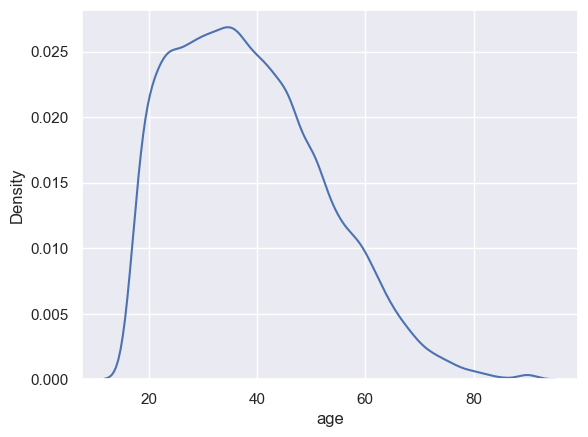

In [12]:
# exploring dependent variables
sns.kdeplot(df['age']);

In [13]:
# age follows a normal distribution

3. Workclass

In [14]:
df[' workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [15]:
df[' workclass'].value_counts()

 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

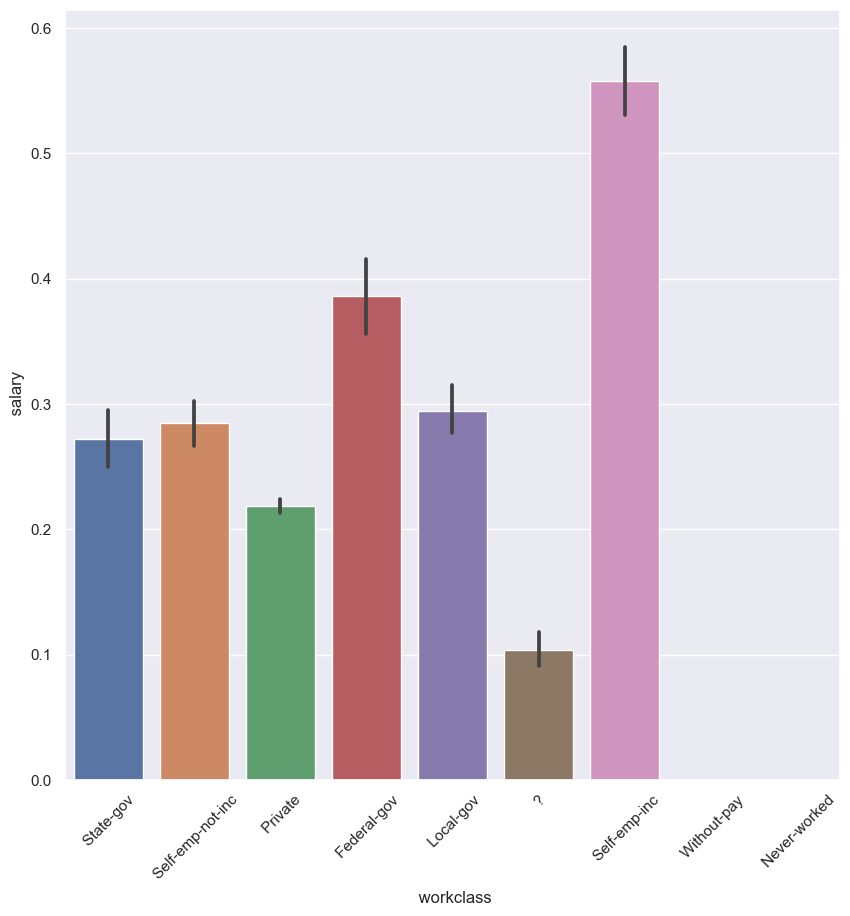

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=' workclass', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

4. fnlwgt

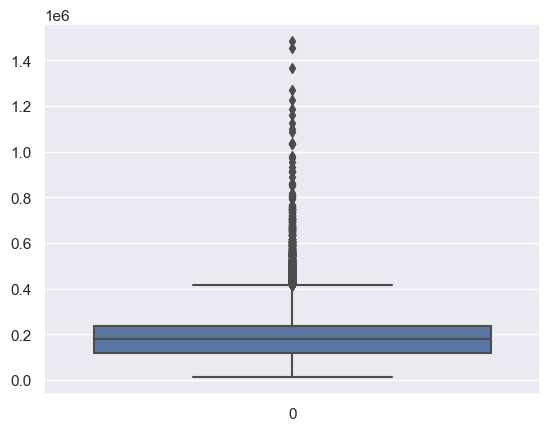

In [17]:
sns.boxplot(df[' fnlwgt']);

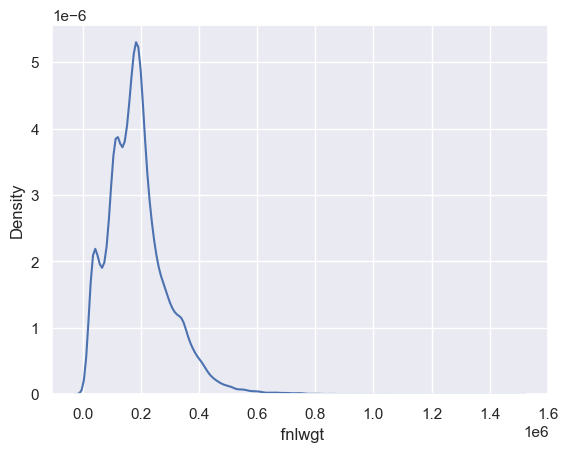

In [18]:
sns.kdeplot(df[' fnlwgt']);

In [19]:
# We will scale this variable

3. Education

In [20]:
df[' education'].value_counts()

 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

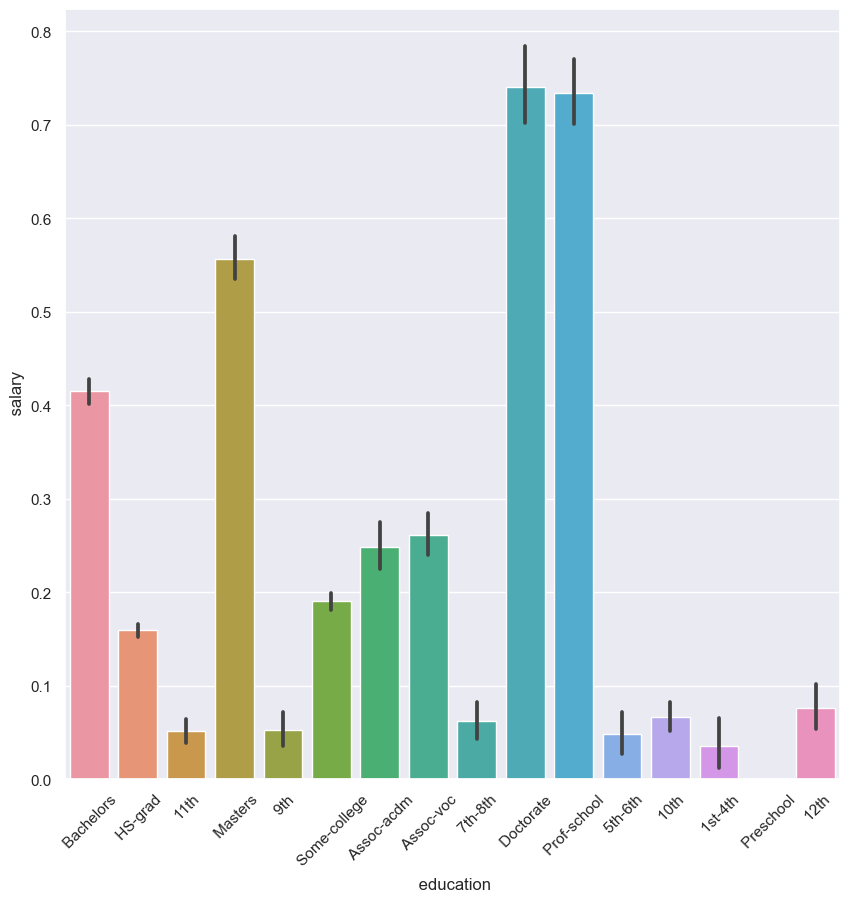

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=' education', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [22]:
# Below Bachelors educated people have similar salary, We'll combine below Bachelors.

In [23]:
df[' education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [24]:
def below_bachlors(education):
    """Checks level of highschool and return Below HS if level of education is below high school"""
    if education in [' HS-grad', ' 11th', ' 9th', ' Some-college', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th']:
        return "Below Bachlors"
    else:
        return education

In [25]:
df[" education"] = df[" education"].apply(below_bachlors)
df[" education"]

0             Bachelors
1             Bachelors
2        Below Bachlors
3        Below Bachlors
4             Bachelors
              ...      
32556        Assoc-acdm
32557    Below Bachlors
32558    Below Bachlors
32559    Below Bachlors
32560    Below Bachlors
Name:  education, Length: 32561, dtype: object

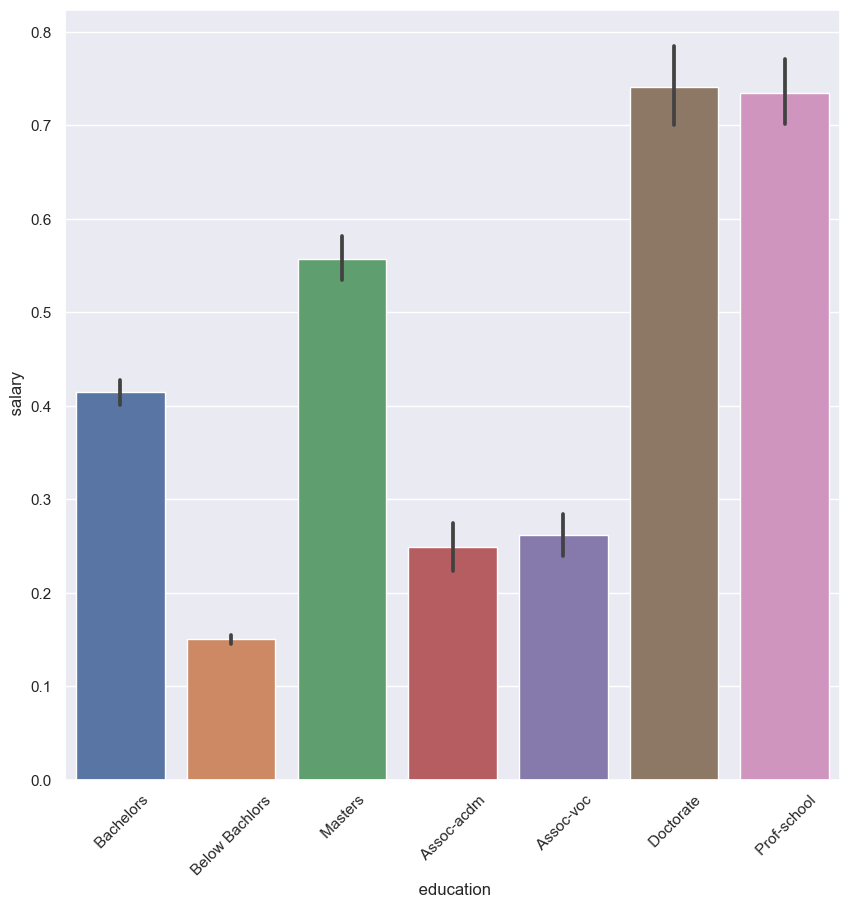

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=' education', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [27]:
# We'll use One Hot Encoder for this feature.

6. education-num

In [28]:
df[' education-num'].value_counts()

 education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

In [29]:
# Its just a number provided against education level.
# We'll drop this column
df.drop(" education-num", axis=1, inplace=True)

7. marital-status

In [30]:
df[' marital-status'].value_counts()

 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

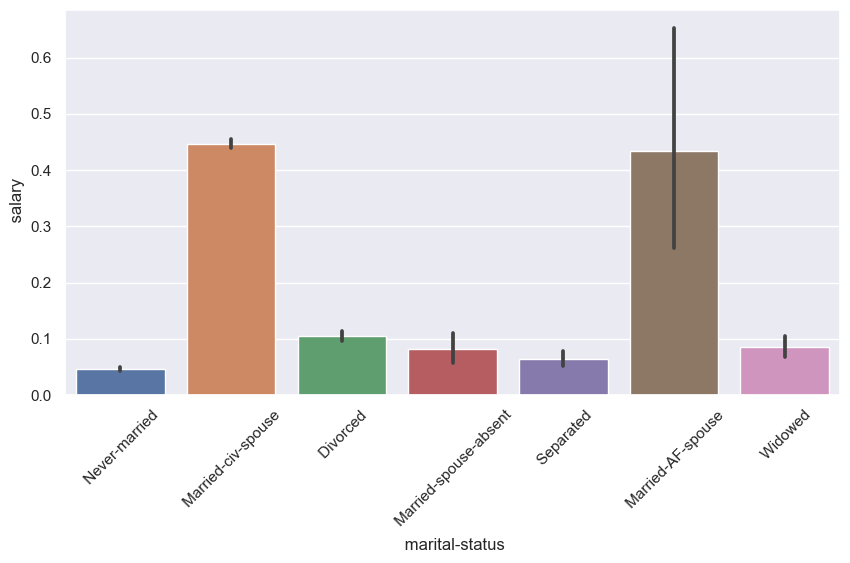

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=' marital-status', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [32]:
# We'll use One Hot Encoder for this feature.

8. occupation

In [33]:
df[' occupation'].value_counts()

 occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: count, dtype: int64

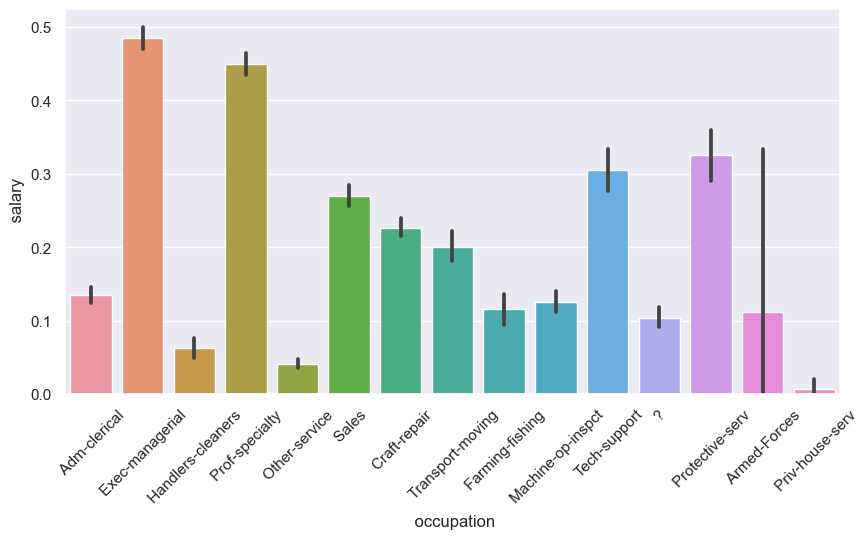

In [34]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=' occupation', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [35]:
# We'll use One Hot Encoder for this feature.

9.  relationship

In [36]:
df[' relationship'].value_counts()

 relationship
 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: count, dtype: int64

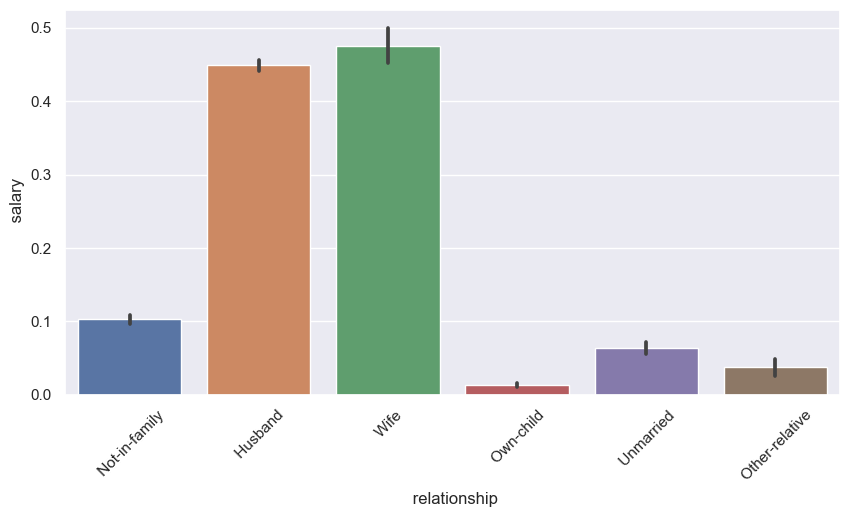

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=' relationship', y=' salary', data=df)
plt.xticks(rotation=45)
plt.show()

In [38]:
# We'll use One Hot Encoder for this feature.

10.  race

In [39]:
df[" race"].value_counts()

 race
 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: count, dtype: int64

11. sex

In [40]:
df[" sex"].value_counts()

 sex
 Male      21790
 Female    10771
Name: count, dtype: int64

In [41]:
df[" sex"] = df[" sex"].apply(lambda x:1 if x ==" Male" else 0)
df[" sex"]

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name:  sex, Length: 32561, dtype: int64

12.  capital-gain

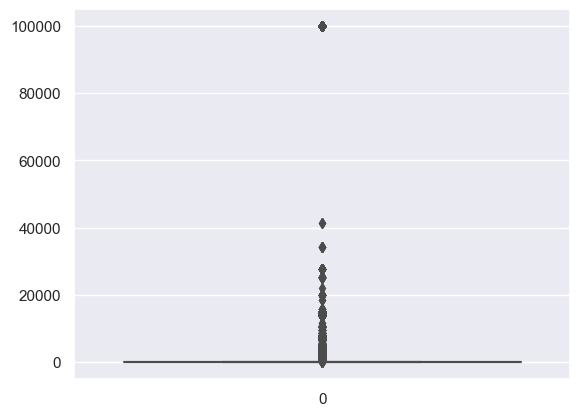

In [42]:
sns.boxplot(df[" capital-gain"]);

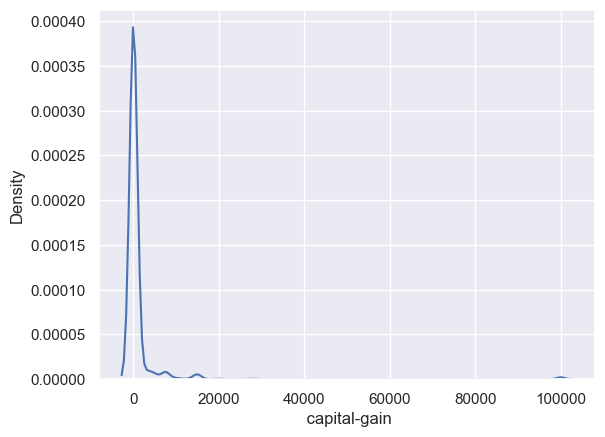

In [43]:
sns.kdeplot(df[" capital-gain"]);

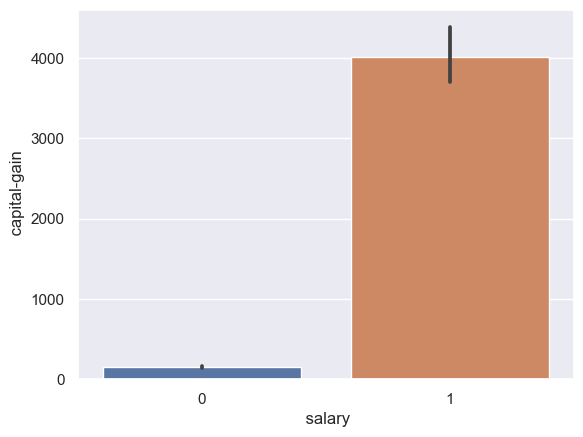

In [44]:
sns.barplot(data=df, y=" capital-gain", x=" salary");

In [45]:
# Check correlation and then decide about this feature

13.  capital-loss

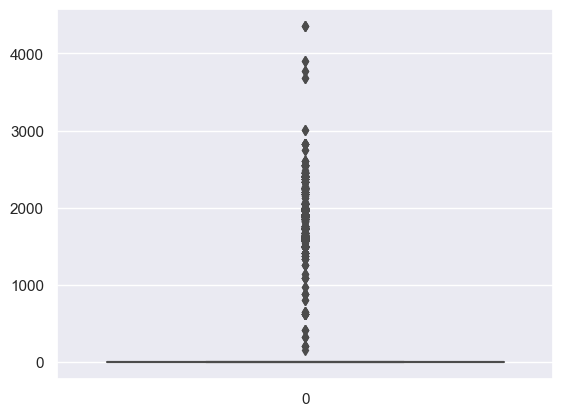

In [46]:
sns.boxplot(df[" capital-loss"]);

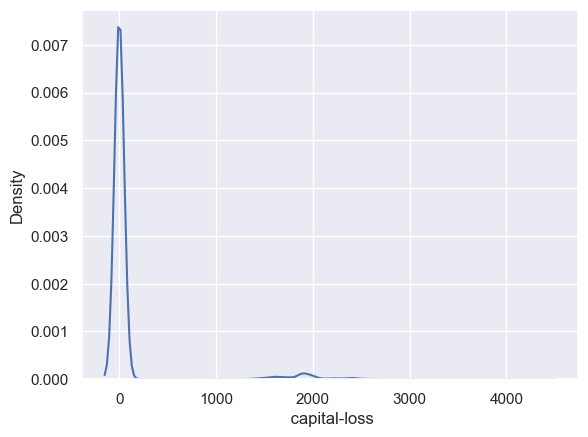

In [47]:
sns.kdeplot(df[" capital-loss"]);

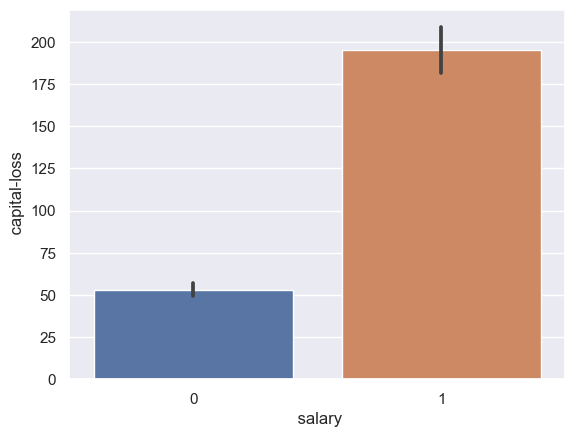

In [48]:
sns.barplot(data=df, y=" capital-loss", x=" salary");

In [49]:
# Check correlation and then decide about this feature

14.  hours-per-week

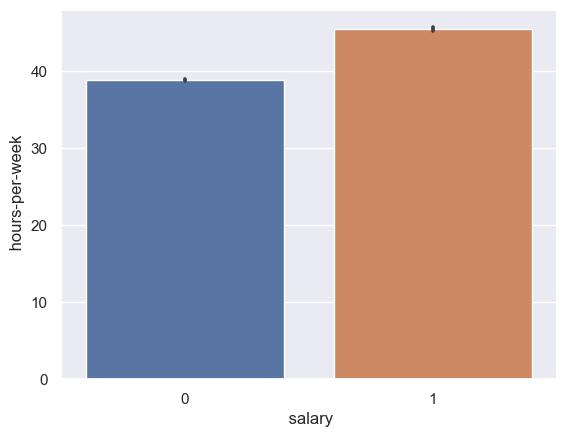

In [50]:
sns.barplot(data=df, x=' salary', y=' hours-per-week');

<Axes: xlabel=' hours-per-week', ylabel='Density'>

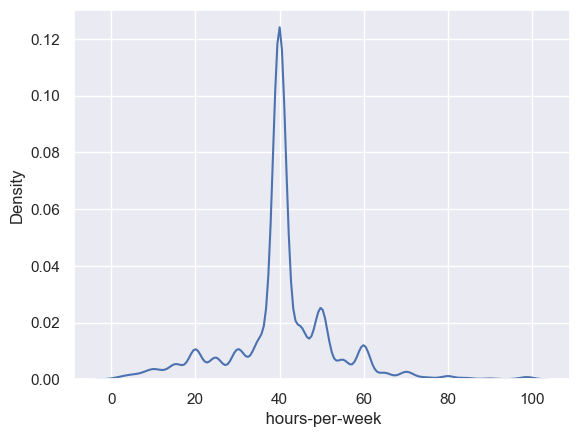

In [51]:
sns.kdeplot(df[" hours-per-week"])

In [52]:
# People working for more hours hve better chances of getting more than 50k salary.

 15. native-country

In [53]:
df[' native-country'].value_counts()

 native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                 

In [54]:
# data is highly biased towards US we'll drop this column
df.drop(" native-country", axis=1, inplace=True)

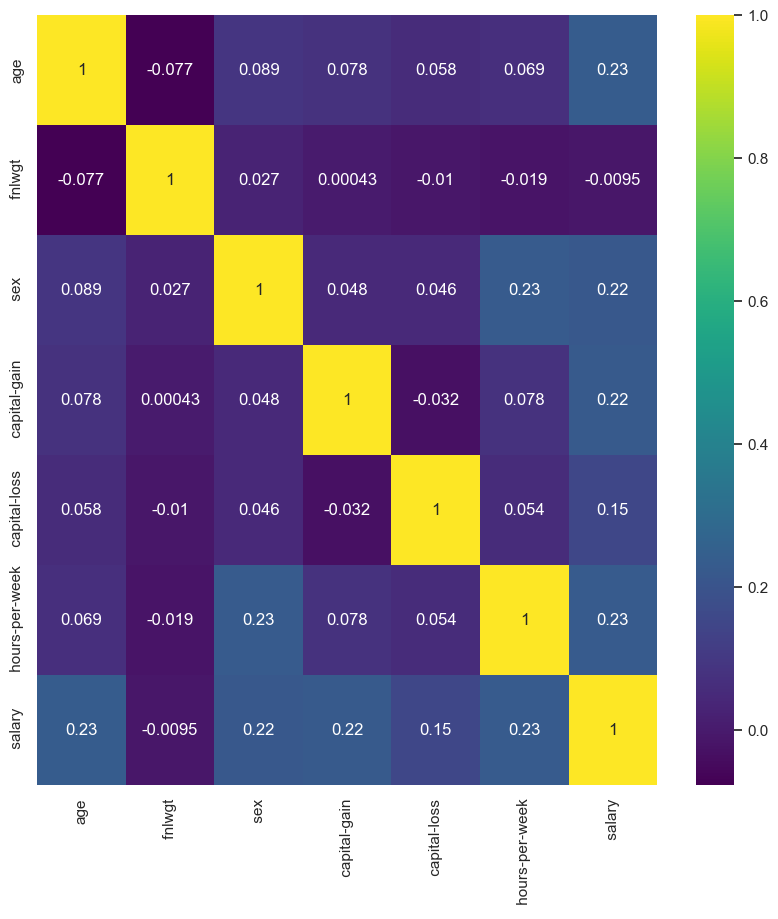

In [55]:
corr = df.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr,annot = True, cmap="viridis")
plt.show()

## Modelling

In [56]:
df_model = df.copy()

In [57]:
df_model.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,0
2,38,Private,215646,Below Bachlors,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,0
3,53,Private,234721,Below Bachlors,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,0


In [58]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' salary'],
      dtype='object')

In [59]:
cat_cols = [' workclass',' education', ' marital-status', ' occupation', ' relationship', ' race']
hot_encode_data = pd.get_dummies(df_model[cat_cols])
df_model.drop(cat_cols , axis=1, inplace=True)
df_model = df_model.join(hot_encode_data)

In [60]:
X = df_model.drop(" salary", axis=1)
y = df_model[" salary"]

In [61]:
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [62]:
y_resampled.value_counts()

 salary
0    24720
1    24720
Name: count, dtype: int64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=101)

## Scaling

In [64]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
def create_model(X_train, X_test, y_train, y_test, algorithm):
    algo = algorithm()
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(algorithm.__name__)
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    # Classification Report
    print("----"*30)
    print(classification_report(y_test, y_pred))
    print("----"*30)
    
    # Confusion Matrix
    print("----"*30)
    print(confusion_matrix(y_test, y_pred))
    print("----"*30)

In [66]:
create_model(X_train, X_test, y_train, y_test, LogisticRegression)

LogisticRegression
Accuracy: 0.8958737864077669
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6180
           1       0.92      0.87      0.89      6180

    accuracy                           0.90     12360
   macro avg       0.90      0.90      0.90     12360
weighted avg       0.90      0.90      0.90     12360

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
[[5723  457]
 [ 830 5350]]
------------------------------------------------------------------------------------------------------------------------


In [67]:
create_model(X_train, X_test, y_train, y_test, RandomForestClassifier)

RandomForestClassifier
Accuracy: 0.8938511326860842
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      6180
           1       0.90      0.88      0.89      6180

    accuracy                           0.89     12360
   macro avg       0.89      0.89      0.89     12360
weighted avg       0.89      0.89      0.89     12360

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
[[5597  583]
 [ 729 5451]]
------------------------------------------------------------------------------------------------------------------------


In [68]:
create_model(X_train, X_test, y_train, y_test, XGBClassifier)

XGBClassifier
Accuracy: 0.9084142394822007
------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6180
           1       0.92      0.89      0.91      6180

    accuracy                           0.91     12360
   macro avg       0.91      0.91      0.91     12360
weighted avg       0.91      0.91      0.91     12360

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
[[5714  466]
 [ 666 5514]]
------------------------------------------------------------------------------------------------------------------------
